# 1. Dropout

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
# hyperparameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
drop_prob = 0.3

In [3]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [4]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [5]:
# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p=drop_prob)

In [6]:
# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0098,  0.0851,  0.0625,  ..., -0.1042,  0.0286, -0.0932],
        [-0.0105,  0.0002,  0.0269,  ...,  0.1066,  0.0350, -0.0724],
        [-0.0044, -0.0074, -0.0896,  ...,  0.0612,  0.1051, -0.0782],
        ...,
        [ 0.0628,  0.0540, -0.0321,  ..., -0.0272, -0.0203, -0.0667],
        [ 0.0705, -0.0085,  0.0545,  ..., -0.0678, -0.0130,  0.0024],
        [ 0.0580, -0.0652, -0.0086,  ..., -0.0333, -0.0562,  0.0266]],
       requires_grad=True)

In [8]:
# model
model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout,
                            linear5)

In [10]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.074410267
Epoch: 0002 cost = 0.067276292
Epoch: 0003 cost = 0.062748119
Epoch: 0004 cost = 0.061132729
Epoch: 0005 cost = 0.055018391
Epoch: 0006 cost = 0.051528081
Epoch: 0007 cost = 0.050243720
Epoch: 0008 cost = 0.050961550
Epoch: 0009 cost = 0.044339821
Epoch: 0010 cost = 0.041924808
Epoch: 0011 cost = 0.040295839
Epoch: 0012 cost = 0.042615779
Epoch: 0013 cost = 0.040489968
Epoch: 0014 cost = 0.038096547
Epoch: 0015 cost = 0.037168182
Learning finished


In [ ]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    # Test the model using test sets
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

# 2. Batch Normalization vs Dropout vs NN (without BN, Dropout)

In [13]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pylab as plt

In [14]:
# parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 32

In [15]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [16]:
# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)

In [27]:
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p=0.3)
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)

In [28]:
# model
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                            linear2, bn2, relu,
                            linear3)
do_model = torch.nn.Sequential(linear1, relu, dropout,
                               linear2, relu, dropout,
                               linear3)
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3)

In [29]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()   # Softmax is internally computed.
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr=learning_rate)
do_optimizer = torch.optim.Adam(do_model.parameters(), lr=learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr=learning_rate)

In [33]:
# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)
for epoch in range(training_epochs):
    bn_model.train()  # set the model to train mode
    do_model.train()

    for X, Y in train_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()
        
        do_optimizer.zero_grad()
        do_prediction = do_model(X)
        do_loss = criterion(do_prediction, Y)
        do_loss.backward()
        do_optimizer.step()

        nn_optimizer.zero_grad()
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        nn_loss.backward()
        nn_optimizer.step()

    with torch.no_grad():
        bn_model.eval()     # set the model to evaluation mode
        do_model.eval()

        # Test the model using train sets
        bn_loss, do_loss, nn_loss, bn_acc, do_acc, nn_acc = 0, 0, 0, 0, 0, 0
        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()
            
            do_prediction = do_model(X)
            do_correct_prediction = torch.argmax(do_prediction, 1) == Y
            do_loss += criterion(do_prediction, Y)
            do_acc += do_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, do_loss, nn_loss, bn_acc, do_acc, nn_acc = (bn_loss / train_total_batch, do_loss / train_total_batch,
        nn_loss / train_total_batch, bn_acc / train_total_batch, do_acc / train_total_batch, nn_acc / train_total_batch)

        # Save train losses/acc
        train_losses.append([bn_loss, do_loss, nn_loss])
        train_accs.append([bn_acc, do_acc, nn_acc])
        print(
            '[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs Dropout Loss(Acc): do_loss:%.5f(do_acc:%.2f) vs Simple NN Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
            (epoch + 1), bn_loss.item(), bn_acc.item(), do_loss.item(), do_acc.item(), nn_loss.item(), nn_acc.item()))
        # Test the model using test sets
        bn_loss, do_loss, nn_loss, bn_acc, do_acc, nn_acc = 0, 0, 0, 0, 0, 0
        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()
            
            do_prediction = do_model(X)
            do_correct_prediction = torch.argmax(do_prediction, 1) == Y
            do_loss += criterion(do_prediction, Y)
            do_acc += do_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, do_loss, nn_loss, bn_acc, do_acc, nn_acc = (bn_loss / test_total_batch, do_loss / test_total_batch,
        nn_loss / test_total_batch, bn_acc / test_total_batch, do_acc / test_total_batch, nn_acc / test_total_batch)

        # Save valid losses/acc
        valid_losses.append([bn_loss, do_loss, nn_loss])
        valid_accs.append([bn_acc, do_acc, nn_acc])
        print(
            '[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs Dropout Loss(Acc): do_loss:%.5f(do_acc:%.2f) vs Simple NN Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
                (epoch + 1), bn_loss.item(), bn_acc.item(), do_loss.item(), do_acc.item(), nn_loss.item(), nn_acc.item()))
        print()

print('Learning finished')


[Epoch 1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.11781(bn_acc:0.96) vs Dropout Loss(Acc): do_loss:0.24434(do_acc:0.93) vs Simple NN Loss(Acc): nn_loss:0.14129(nn_acc:0.96)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.13458(bn_acc:0.96) vs Dropout Loss(Acc): do_loss:0.27670(do_acc:0.92) vs Simple NN Loss(Acc): nn_loss:0.17696(nn_acc:0.95)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.11817(bn_acc:0.97) vs Dropout Loss(Acc): do_loss:0.26484(do_acc:0.93) vs Simple NN Loss(Acc): nn_loss:0.13701(nn_acc:0.96)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.13687(bn_acc:0.96) vs Dropout Loss(Acc): do_loss:0.29851(do_acc:0.92) vs Simple NN Loss(Acc): nn_loss:0.20694(nn_acc:0.95)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.10120(bn_acc:0.97) vs Dropout Loss(Acc): do_loss:0.22932(do_acc:0.94) vs Simple NN Loss(Acc): nn_loss:0.10896(nn_acc:0.97)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.13273(bn_acc:0.96) vs Dropout Loss(Acc): do_loss:0.29122(do_acc:0.92) vs Simple NN Loss(Acc): nn_loss

In [34]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    do = [i[1] for i in loss_list]
    nn = [i[2] for i in loss_list]

    plt.figure(figsize=(9, 6))
    plt.plot(bn, label='With BN')
    plt.plot(do, label='With Dropout')
    plt.plot(nn, label='Without BN and DO')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

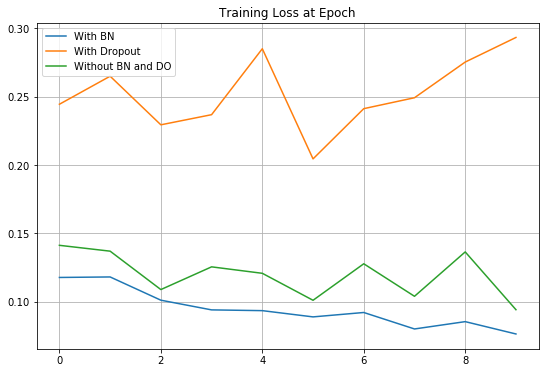

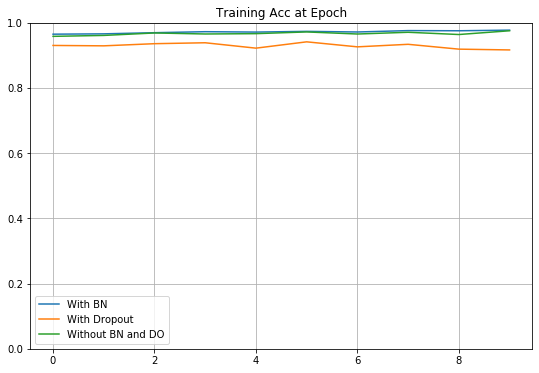

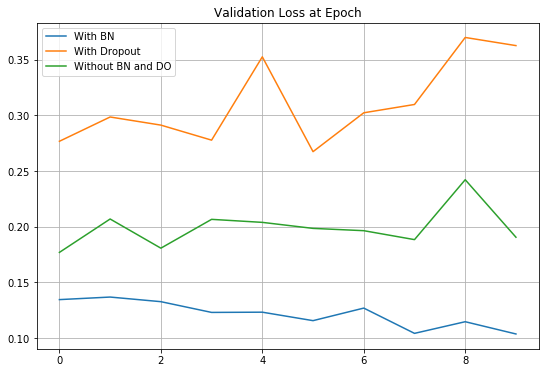

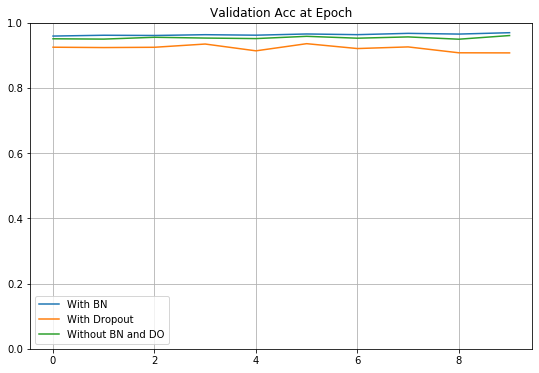

In [35]:
plot_compare(train_losses, title='Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_losses, title='Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title='Validation Acc at Epoch')